In [333]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Adagrad
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import tree

In [334]:
DFTrain= pd.read_csv('train.csv',index_col='0')

In [335]:
DFTest=pd.read_csv('X_test.csv',index_col='0')


In [336]:
DFTrain

,1,2,3,4,5,6,7,8,9,10,...,583,584,585,586,587,588,589,590,591,Activity
0,,,,,,,,,,,,,,,,,,,,,
0,2135.236252,281.976538,-0.109396,875.771368,-0.123244,-0.281097,-0.265103,1897.816419,851.707715,0.217989,...,NaN,-0.606182,NaN,734.183280,0.871030,-0.399949,2135.236252,573.367937,352.125227,WALKING
1,2135.311377,281.974815,-0.147144,875.701796,-0.105104,-0.372639,-0.383011,1897.854053,851.639244,0.069007,...,125.017049,-0.668752,-0.521300,734.019049,0.826877,-0.324508,2135.311377,573.275864,352.027432,WALKING_UPSTAIRS
2,2135.368373,281.960616,-0.148159,875.971211,-0.049818,-0.500648,-0.108752,1898.014887,851.496415,0.137359,...,NaN,-0.462907,-0.225391,734.159391,0.714265,-0.492571,2135.368373,573.197053,352.033002,WALKING_UPSTAIRS
3,2135.263336,281.983003,-0.103230,875.016028,-0.988986,-0.991141,-0.985290,1897.010854,851.008326,-0.933950,...,125.000547,-0.997064,-0.984804,734.005127,-0.618741,-0.993283,2135.263336,573.000178,352.000020,LAYING
4,2135.281720,281.984030,-0.110049,875.007066,-0.994860,-0.995871,-0.993036,1897.006260,851.004576,-0.938318,...,NaN,-0.998858,-0.993022,734.005172,-0.692740,-0.993393,2135.281720,573.000099,352.000009,LAYING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,2135.348423,281.964154,-0.123457,875.676101,-0.161238,-0.293632,-0.356498,1897.819353,851.710193,0.024781,...,125.226085,-0.517199,-0.442899,734.315655,0.848323,-0.491631,2135.348423,573.497745,352.042654,WALKING
3331,2135.253671,281.973120,-0.104928,876.336920,0.121086,-0.047860,0.287643,1898.118948,851.933394,0.550500,...,NaN,-0.469485,NaN,734.165017,0.870645,-0.208650,2135.253671,573.677656,352.175823,WALKING_DOWNSTAIRS
3332,2135.260128,281.979799,-0.131296,876.044787,0.406546,NaN,-0.093965,1898.264188,851.687407,0.558448,...,NaN,-0.161126,-0.478846,734.566784,0.844830,-0.416839,2135.260128,573.617735,352.117083,WALKING_DOWNSTAIRS


In [337]:
Ac=pd.DataFrame(DFTrain['Activity'])

In [338]:
Ac

,Activity
0,
0,WALKING
1,WALKING_UPSTAIRS
2,WALKING_UPSTAIRS
3,LAYING
4,LAYING
...,...
3330,WALKING
3331,WALKING_DOWNSTAIRS
3332,WALKING_DOWNSTAIRS


In [339]:
type(Ac)

pandas.core.frame.DataFrame

In [340]:
DFTr=DFTrain.drop(['Activity'],axis=1)

In [341]:
DFTr['591']

0
0       352.125227
1       352.027432
2       352.033002
3       352.000020
4       352.000009
           ...    
3330    352.042654
3331    352.175823
3332    352.117083
3333    352.000042
3334           NaN
Name: 591, Length: 3233, dtype: float64

In [342]:
DFTr[591]

KeyError: 591

In [343]:
dfTrain=DFTr.rename(columns={x:y for x,y in zip(DFTr.columns,range(1,len(DFTr.columns)))})

In [344]:
dfTrain[590] # last element in the dfTrain

0
0       573.367937
1       573.275864
2       573.197053
3       573.000178
4       573.000099
           ...    
3330    573.497745
3331    573.677656
3332    573.617735
3333    573.000151
3334           NaN
Name: 590, Length: 3233, dtype: float64

In [345]:
dfTrain

,1,2,3,4,5,6,7,8,9,10,...,582,583,584,585,586,587,588,589,590,591
0,,,,,,,,,,,,,,,,,,,,,
0,2135.236252,281.976538,-0.109396,875.771368,-0.123244,-0.281097,-0.265103,1897.816419,851.707715,0.217989,...,-0.621741,NaN,-0.606182,NaN,734.183280,0.871030,-0.399949,2135.236252,573.367937,352.125227
1,2135.311377,281.974815,-0.147144,875.701796,-0.105104,-0.372639,-0.383011,1897.854053,851.639244,0.069007,...,-0.862140,125.017049,-0.668752,-0.521300,734.019049,0.826877,-0.324508,2135.311377,573.275864,352.027432
2,2135.368373,281.960616,-0.148159,875.971211,-0.049818,-0.500648,-0.108752,1898.014887,851.496415,0.137359,...,-0.896673,NaN,-0.462907,-0.225391,734.159391,0.714265,-0.492571,2135.368373,573.197053,352.033002
3,2135.263336,281.983003,-0.103230,875.016028,-0.988986,-0.991141,-0.985290,1897.010854,851.008326,-0.933950,...,-0.999815,125.000547,-0.997064,-0.984804,734.005127,-0.618741,-0.993283,2135.263336,573.000178,352.000020
4,2135.281720,281.984030,-0.110049,875.007066,-0.994860,-0.995871,-0.993036,1897.006260,851.004576,-0.938318,...,-0.999875,NaN,-0.998858,-0.993022,734.005172,-0.692740,-0.993393,2135.281720,573.000099,352.000009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,2135.348423,281.964154,-0.123457,875.676101,-0.161238,-0.293632,-0.356498,1897.819353,851.710193,0.024781,...,-0.523956,125.226085,-0.517199,-0.442899,734.315655,0.848323,-0.491631,2135.348423,573.497745,352.042654
3331,2135.253671,281.973120,-0.104928,876.336920,0.121086,-0.047860,0.287643,1898.118948,851.933394,0.550500,...,-0.667187,NaN,-0.469485,NaN,734.165017,0.870645,-0.208650,2135.253671,573.677656,352.175823
3332,2135.260128,281.979799,-0.131296,876.044787,0.406546,NaN,-0.093965,1898.264188,851.687407,0.558448,...,-0.781715,NaN,-0.161126,-0.478846,734.566784,0.844830,-0.416839,2135.260128,573.617735,352.117083


In [346]:
dfTest[4]

0
3767    875.005198
9695    875.002610
5223    875.041627
3221    875.697118
1341    876.139005
           ...    
1615    875.030453
9555    875.070146
5054    875.569464
627     875.939361
4369    875.651713
Name: 4, Length: 309, dtype: float64

In [347]:
dfTest=DFTest.rename(columns={x:y for x,y in zip(DFTest.columns,range(1,len(DFTest.columns)))})

In [348]:
dfTest

,1,2,3,4,5,6,7,8,9,10,...,582,583,584,585,586,587,588,589,590,591
0,,,,,,,,,,,,,,,,,,,,,
3767,2135.277880,281.982374,-0.108436,875.005198,-0.952356,-0.979984,-0.995380,1897.051449,851.021605,-0.937402,...,-0.999897,125.000707,-0.988601,-0.995886,734.005904,-0.336026,-0.968572,2135.277880,573.000215,352.000192
9695,2135.274649,281.977831,-0.120136,875.002610,-0.993128,-0.979517,-0.998225,1897.007912,851.021747,-0.942807,...,-0.999864,NaN,-0.999030,-0.998731,734.015125,-0.890670,-0.968459,2135.274649,573.000061,352.000007
5223,2135.259475,281.985347,-0.104619,875.041627,-0.963087,-0.984063,-0.957998,1897.040356,851.017116,-0.914429,...,-0.999797,NaN,-0.991843,-0.956208,734.006320,-0.573251,-0.970980,2135.259475,573.000158,352.000017
3221,2135.307123,281.961987,-0.145827,875.697118,-0.150019,-0.125775,-0.337688,1897.835300,851.929629,-0.217076,...,-0.931232,NaN,-0.460524,NaN,734.272621,0.801238,0.070937,2135.307123,573.236869,352.185924
1341,2135.141467,281.955141,-0.072572,876.139005,-0.229146,0.118600,0.032058,1897.682290,852.062109,0.551623,...,-0.725425,NaN,-0.486854,NaN,734.171993,0.857132,0.026913,2135.141467,573.284080,352.042186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2135.286841,281.986279,NaN,875.030453,-0.914033,-0.950577,-0.971859,1897.080921,851.046785,-0.891277,...,-0.995389,125.001542,-0.964727,NaN,734.000316,-0.009229,-0.963581,2135.286841,573.004217,352.000277
9555,2135.276039,281.985130,-0.080196,875.070146,-0.800382,-0.736420,-0.950752,1897.178953,851.272103,-0.802627,...,-0.994159,125.003597,-0.895115,-0.972352,734.047733,0.273691,-0.728726,2135.276039,573.010055,352.000224
5054,2135.302184,281.966213,-0.130727,875.569464,-0.254964,-0.111800,-0.457695,1897.721497,851.956052,-0.290227,...,-0.904010,125.067424,-0.330258,-0.524783,734.232088,0.781728,-0.012748,2135.302184,573.194881,352.024802


In [349]:
dfTest[590] # last feature 

0
3767    573.000215
9695    573.000061
5223    573.000158
3221    573.236869
1341    573.284080
           ...    
1615    573.004217
9555    573.010055
5054    573.194881
627     573.014223
4369    573.688146
Name: 590, Length: 309, dtype: float64

In [350]:
DFConcat = pd.concat([dfTest, dfTrain])

In [351]:
DFConcat 

,1,2,3,4,5,6,7,8,9,10,...,582,583,584,585,586,587,588,589,590,591
0,,,,,,,,,,,,,,,,,,,,,
3767,2135.277880,281.982374,-0.108436,875.005198,-0.952356,-0.979984,-0.995380,1897.051449,851.021605,-0.937402,...,-0.999897,125.000707,-0.988601,-0.995886,734.005904,-0.336026,-0.968572,2135.277880,573.000215,352.000192
9695,2135.274649,281.977831,-0.120136,875.002610,-0.993128,-0.979517,-0.998225,1897.007912,851.021747,-0.942807,...,-0.999864,NaN,-0.999030,-0.998731,734.015125,-0.890670,-0.968459,2135.274649,573.000061,352.000007
5223,2135.259475,281.985347,-0.104619,875.041627,-0.963087,-0.984063,-0.957998,1897.040356,851.017116,-0.914429,...,-0.999797,NaN,-0.991843,-0.956208,734.006320,-0.573251,-0.970980,2135.259475,573.000158,352.000017
3221,2135.307123,281.961987,-0.145827,875.697118,-0.150019,-0.125775,-0.337688,1897.835300,851.929629,-0.217076,...,-0.931232,NaN,-0.460524,NaN,734.272621,0.801238,0.070937,2135.307123,573.236869,352.185924
1341,2135.141467,281.955141,-0.072572,876.139005,-0.229146,0.118600,0.032058,1897.682290,852.062109,0.551623,...,-0.725425,NaN,-0.486854,NaN,734.171993,0.857132,0.026913,2135.141467,573.284080,352.042186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,2135.348423,281.964154,-0.123457,875.676101,-0.161238,-0.293632,-0.356498,1897.819353,851.710193,0.024781,...,-0.523956,125.226085,-0.517199,-0.442899,734.315655,0.848323,-0.491631,2135.348423,573.497745,352.042654
3331,2135.253671,281.973120,-0.104928,876.336920,0.121086,-0.047860,0.287643,1898.118948,851.933394,0.550500,...,-0.667187,NaN,-0.469485,NaN,734.165017,0.870645,-0.208650,2135.253671,573.677656,352.175823
3332,2135.260128,281.979799,-0.131296,876.044787,0.406546,NaN,-0.093965,1898.264188,851.687407,0.558448,...,-0.781715,NaN,-0.161126,-0.478846,734.566784,0.844830,-0.416839,2135.260128,573.617735,352.117083


In [352]:
concat = DFConcat.dropna(axis=1)

In [353]:
concat

,2,4,5,7,8,9,10,11,12,13,...,538,539,540,541,542,543,544,545,546,547
0,,,,,,,,,,,,,,,,,,,,,
3767,281.982374,875.005198,-0.952356,-0.995380,1897.051449,851.021605,-0.937402,-0.550173,-0.817157,0.846174,...,654.051282,491.348079,414.877634,-0.515172,-0.984325,-0.990962,-0.989071,-0.992376,1857.024513,-0.984325
9695,281.977831,875.002610,-0.993128,-0.998225,1897.007912,851.021747,-0.942807,-0.580385,-0.813826,0.847247,...,654.000000,491.001506,415.089692,-0.172275,-0.998714,-0.998564,-0.998402,-0.998821,1857.006688,-0.998714
5223,281.985347,875.041627,-0.963087,-0.957998,1897.040356,851.017116,-0.914429,-0.557181,-0.815655,0.816836,...,654.051282,490.805284,414.695634,-0.672098,-0.991537,-0.992249,-0.991049,-0.993952,1857.006215,-0.991537
3221,281.961987,875.697118,-0.150019,-0.337688,1897.835300,851.929629,-0.217076,-0.105233,-0.377068,0.256981,...,654.102564,491.007484,414.494185,-0.805112,-0.733238,-0.714687,-0.740433,-0.669012,1857.118167,-0.733238
1341,281.955141,876.139005,-0.229146,0.032058,1897.682290,852.062109,0.551623,0.210984,-0.280410,0.120475,...,654.000000,490.962257,414.708446,-0.613984,-0.553619,-0.556321,-0.568089,-0.580025,1857.074050,-0.553619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,281.964154,875.676101,-0.161238,-0.356498,1897.819353,851.710193,0.024781,-0.060535,-0.327968,0.342730,...,654.666667,491.195161,414.750740,-0.584964,-0.700113,-0.708797,-0.701699,-0.730432,1857.295075,-0.700113
3331,281.973120,876.336920,0.121086,0.287643,1898.118948,851.933394,0.550500,0.038960,0.013323,0.074274,...,654.256410,491.233140,414.529945,-0.749456,-0.395616,-0.490085,-0.463708,-0.578690,1857.017766,-0.395616
3332,281.979799,876.044787,0.406546,-0.093965,1898.264188,851.687407,0.558448,0.127667,-0.186650,0.174247,...,654.000000,490.944974,415.003831,-0.306492,-0.382221,-0.315458,-0.301288,-0.252535,1857.124647,-0.382221


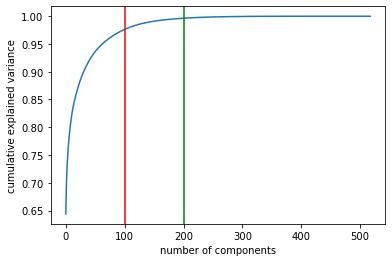

In [354]:
pca = PCA().fit(concat)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axvline(x=100,color='r')
plt.axvline(x=200,color='g')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [355]:
pca = PCA(250)
pca.fit(concat)
x_pca=pca.transform(concat)

In [356]:
Xdata=pd.DataFrame(x_pca)

In [357]:
df_train =Xdata.iloc[:3233,:] #as known from previous 
df_test = Xdata.iloc[3233:,:]

In [358]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,-5.390129,0.312017,-1.080219,0.500379,0.683685,-0.403603,0.782949,-0.558957,-1.528049,0.591393,...,0.011719,-0.015221,0.011543,-0.085097,0.038189,0.029094,0.001408,0.016184,-0.020135,-0.001664
1,-5.880304,0.591390,-1.484818,1.166462,-0.164773,-0.565025,0.084460,-0.391220,-0.548044,-0.846393,...,0.012170,0.013324,-0.003875,0.024981,0.024770,0.004239,-0.000846,0.000576,0.016982,-0.032628
2,-5.367544,-0.242330,1.876596,1.067840,-1.062747,0.759069,0.848878,0.563395,-0.064170,-1.200212,...,0.017329,0.015365,-0.005842,-0.018071,-0.035462,-0.038575,-0.010195,0.029965,-0.032898,0.004596
3,4.315188,-0.746519,-0.195893,-1.220039,0.333927,0.634507,0.013593,0.801240,-0.914543,0.409743,...,0.003727,-0.064677,0.023505,-0.094333,-0.027424,-0.002860,0.060503,-0.028082,0.048437,0.025287
4,6.569182,0.682262,-0.084544,0.662535,-0.622109,1.516147,-1.155118,-0.073502,-0.342107,0.901646,...,-0.040279,0.051419,0.071690,0.030829,-0.056715,-0.062957,-0.032257,0.089604,-0.011406,0.027916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,-4.262705,1.901877,-1.832084,-1.374277,0.006015,0.419609,0.704941,0.349627,-0.104556,0.423361,...,-0.030178,0.037798,-0.017420,-0.018659,-0.036725,-0.023778,0.012960,-0.069829,0.075623,0.004663
3229,3.051131,-1.107940,-0.326978,-1.423366,0.527082,1.319177,0.088882,0.681832,-0.947488,0.698343,...,0.019162,-0.022474,0.046731,0.017676,-0.030366,0.014064,0.016752,-0.087904,-0.078274,-0.029041
3230,-5.913182,1.375278,-1.186664,0.635444,-0.449790,0.379178,-0.267951,1.068100,0.289257,-0.150330,...,0.004673,0.018097,-0.047262,-0.008438,0.025375,-0.004563,-0.007570,-0.012897,0.033830,-0.009982
3231,3.942680,-0.945985,-0.234788,-1.708363,0.042290,-0.814469,0.897256,-0.053221,-0.049337,-0.294918,...,-0.026159,-0.013020,0.025676,-0.002255,0.050549,0.020895,-0.033132,-0.000200,-0.042189,0.013892


In [359]:
df_test

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
3233,5.407608,-0.035174,0.044675,-0.899535,0.601242,0.960152,0.349488,0.759600,-0.499117,0.973312,...,-0.044324,-0.039552,0.017129,-0.035464,-0.092840,-0.097932,-0.055686,0.004645,0.063767,-0.016405
3234,4.585225,-0.518827,-0.407736,-0.755091,-0.664329,-1.399451,0.653591,0.529709,0.285853,-1.039904,...,0.023556,0.073381,-0.016885,-0.023557,0.042190,0.052464,-0.022667,-0.019720,0.010006,0.049405
3235,8.237526,2.149683,0.403012,0.749141,-0.928571,0.659792,-0.229077,-1.022824,-0.959285,1.027868,...,0.098518,-0.067884,-0.017578,0.038239,0.034558,-0.022062,0.037552,0.034193,-0.015033,-0.060214
3236,5.490285,0.926298,-0.617217,-1.023223,0.320154,0.196330,1.654224,-0.068256,-0.798530,-0.892020,...,-0.017454,0.025585,0.037934,-0.008454,-0.035526,-0.006243,0.007701,0.025747,-0.000831,-0.002189
3237,-4.747172,-1.070617,3.263931,-0.300537,-0.327830,-0.676974,-0.145247,-1.350407,0.936912,-0.270781,...,0.030390,-0.023387,-0.026656,0.042105,0.010490,0.022870,0.002213,-0.045551,0.034458,-0.002621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3537,4.736297,0.930313,-0.745259,-1.592892,-0.192622,-0.200883,1.106729,0.532914,-1.206021,-0.858217,...,0.015881,0.003825,-0.031112,-0.072506,0.060716,-0.017329,0.011233,-0.025783,-0.026427,-0.051555
3538,8.499518,1.846970,0.505834,0.336669,-0.962154,0.050977,-0.550624,-0.253482,-0.319387,0.797191,...,-0.039287,0.055881,0.067702,0.029716,-0.018788,0.079733,-0.026245,-0.009347,-0.026795,-0.028099
3539,8.631391,1.827196,0.217989,0.862158,-1.743630,-0.837091,-0.010199,-0.901280,0.461292,0.479283,...,0.004116,-0.055829,-0.019288,-0.026273,0.037088,0.061851,-0.062002,-0.062852,-0.042942,0.002202
3540,-5.814001,2.097427,1.012212,-1.034874,0.455886,0.821535,-0.781266,0.757715,0.252234,-0.573829,...,0.035365,0.003420,0.061972,-0.010752,0.018537,-0.036929,0.019278,-0.017664,0.048025,-0.002840


In [360]:
Ac.Activity.isna().sum()

1

In [361]:
Ac.Activity.value_counts()

LAYING                586
STANDING              576
SITTING               564
WALKING               544
WALKING_UPSTAIRS      509
WALKING_DOWNSTAIRS    453
Name: Activity, dtype: int64

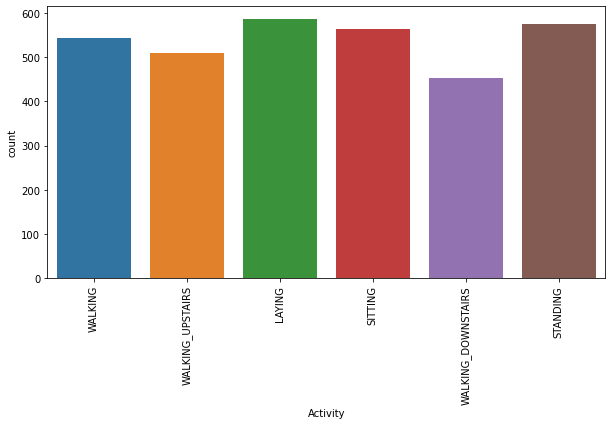

In [362]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="Activity", data=Ac)
plt.xticks(x = Ac['Activity'],  rotation='vertical')
plt.show()

In [363]:
df_train['Activity']=Ac

<ipython-input-363-55ad0beed910>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Activity']=Ac


In [364]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,Activity
0,-5.390129,0.312017,-1.080219,0.500379,0.683685,-0.403603,0.782949,-0.558957,-1.528049,0.591393,...,-0.015221,0.011543,-0.085097,0.038189,0.029094,0.001408,0.016184,-0.020135,-0.001664,WALKING
1,-5.880304,0.591390,-1.484818,1.166462,-0.164773,-0.565025,0.084460,-0.391220,-0.548044,-0.846393,...,0.013324,-0.003875,0.024981,0.024770,0.004239,-0.000846,0.000576,0.016982,-0.032628,WALKING_UPSTAIRS
2,-5.367544,-0.242330,1.876596,1.067840,-1.062747,0.759069,0.848878,0.563395,-0.064170,-1.200212,...,0.015365,-0.005842,-0.018071,-0.035462,-0.038575,-0.010195,0.029965,-0.032898,0.004596,WALKING_UPSTAIRS
3,4.315188,-0.746519,-0.195893,-1.220039,0.333927,0.634507,0.013593,0.801240,-0.914543,0.409743,...,-0.064677,0.023505,-0.094333,-0.027424,-0.002860,0.060503,-0.028082,0.048437,0.025287,LAYING
4,6.569182,0.682262,-0.084544,0.662535,-0.622109,1.516147,-1.155118,-0.073502,-0.342107,0.901646,...,0.051419,0.071690,0.030829,-0.056715,-0.062957,-0.032257,0.089604,-0.011406,0.027916,LAYING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,-4.262705,1.901877,-1.832084,-1.374277,0.006015,0.419609,0.704941,0.349627,-0.104556,0.423361,...,0.037798,-0.017420,-0.018659,-0.036725,-0.023778,0.012960,-0.069829,0.075623,0.004663,WALKING_DOWNSTAIRS
3229,3.051131,-1.107940,-0.326978,-1.423366,0.527082,1.319177,0.088882,0.681832,-0.947488,0.698343,...,-0.022474,0.046731,0.017676,-0.030366,0.014064,0.016752,-0.087904,-0.078274,-0.029041,WALKING
3230,-5.913182,1.375278,-1.186664,0.635444,-0.449790,0.379178,-0.267951,1.068100,0.289257,-0.150330,...,0.018097,-0.047262,-0.008438,0.025375,-0.004563,-0.007570,-0.012897,0.033830,-0.009982,STANDING
3231,3.942680,-0.945985,-0.234788,-1.708363,0.042290,-0.814469,0.897256,-0.053221,-0.049337,-0.294918,...,-0.013020,0.025676,-0.002255,0.050549,0.020895,-0.033132,-0.000200,-0.042189,0.013892,STANDING


In [365]:
Ac.Activity.unique()

array(['WALKING', 'WALKING_UPSTAIRS', 'LAYING', 'SITTING',
       'WALKING_DOWNSTAIRS', 'STANDING', nan], dtype=object)

In [366]:
len(df_train['Activity'].unique())

7

In [367]:
df_train = df_train[df_train['Activity'].notna()]

In [368]:
df_train['Activity'].unique()

array(['WALKING', 'WALKING_UPSTAIRS', 'LAYING', 'SITTING',
       'WALKING_DOWNSTAIRS', 'STANDING'], dtype=object)

In [369]:
len(df_train['Activity'].unique())

6

In [370]:
df_train.isnull().sum().sum()

0

In [371]:
dic={'WALKING':1, 'WALKING_UPSTAIRS':2, 'LAYING':3, 'SITTING':4,
       'WALKING_DOWNSTAIRS':5, 'STANDING':6,}

In [372]:
Y = Ac['Activity'].map(dic)

In [373]:
df_train['Ac']= Y

<ipython-input-373-a9812eced647>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Ac']= Y


In [374]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,Activity,Ac
0,-5.390129,0.312017,-1.080219,0.500379,0.683685,-0.403603,0.782949,-0.558957,-1.528049,0.591393,...,0.011543,-0.085097,0.038189,0.029094,0.001408,0.016184,-0.020135,-0.001664,WALKING,1.0
1,-5.880304,0.591390,-1.484818,1.166462,-0.164773,-0.565025,0.084460,-0.391220,-0.548044,-0.846393,...,-0.003875,0.024981,0.024770,0.004239,-0.000846,0.000576,0.016982,-0.032628,WALKING_UPSTAIRS,2.0
2,-5.367544,-0.242330,1.876596,1.067840,-1.062747,0.759069,0.848878,0.563395,-0.064170,-1.200212,...,-0.005842,-0.018071,-0.035462,-0.038575,-0.010195,0.029965,-0.032898,0.004596,WALKING_UPSTAIRS,2.0
3,4.315188,-0.746519,-0.195893,-1.220039,0.333927,0.634507,0.013593,0.801240,-0.914543,0.409743,...,0.023505,-0.094333,-0.027424,-0.002860,0.060503,-0.028082,0.048437,0.025287,LAYING,3.0
4,6.569182,0.682262,-0.084544,0.662535,-0.622109,1.516147,-1.155118,-0.073502,-0.342107,0.901646,...,0.071690,0.030829,-0.056715,-0.062957,-0.032257,0.089604,-0.011406,0.027916,LAYING,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,-4.262705,1.901877,-1.832084,-1.374277,0.006015,0.419609,0.704941,0.349627,-0.104556,0.423361,...,-0.017420,-0.018659,-0.036725,-0.023778,0.012960,-0.069829,0.075623,0.004663,WALKING_DOWNSTAIRS,5.0
3229,3.051131,-1.107940,-0.326978,-1.423366,0.527082,1.319177,0.088882,0.681832,-0.947488,0.698343,...,0.046731,0.017676,-0.030366,0.014064,0.016752,-0.087904,-0.078274,-0.029041,WALKING,1.0
3230,-5.913182,1.375278,-1.186664,0.635444,-0.449790,0.379178,-0.267951,1.068100,0.289257,-0.150330,...,-0.047262,-0.008438,0.025375,-0.004563,-0.007570,-0.012897,0.033830,-0.009982,STANDING,6.0
3231,3.942680,-0.945985,-0.234788,-1.708363,0.042290,-0.814469,0.897256,-0.053221,-0.049337,-0.294918,...,0.025676,-0.002255,0.050549,0.020895,-0.033132,-0.000200,-0.042189,0.013892,STANDING,6.0


In [375]:
DF_train=df_train.drop(['Activity'],axis=1)

In [376]:
DF_train

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,Ac
0,-5.390129,0.312017,-1.080219,0.500379,0.683685,-0.403603,0.782949,-0.558957,-1.528049,0.591393,...,-0.015221,0.011543,-0.085097,0.038189,0.029094,0.001408,0.016184,-0.020135,-0.001664,1.0
1,-5.880304,0.591390,-1.484818,1.166462,-0.164773,-0.565025,0.084460,-0.391220,-0.548044,-0.846393,...,0.013324,-0.003875,0.024981,0.024770,0.004239,-0.000846,0.000576,0.016982,-0.032628,2.0
2,-5.367544,-0.242330,1.876596,1.067840,-1.062747,0.759069,0.848878,0.563395,-0.064170,-1.200212,...,0.015365,-0.005842,-0.018071,-0.035462,-0.038575,-0.010195,0.029965,-0.032898,0.004596,2.0
3,4.315188,-0.746519,-0.195893,-1.220039,0.333927,0.634507,0.013593,0.801240,-0.914543,0.409743,...,-0.064677,0.023505,-0.094333,-0.027424,-0.002860,0.060503,-0.028082,0.048437,0.025287,3.0
4,6.569182,0.682262,-0.084544,0.662535,-0.622109,1.516147,-1.155118,-0.073502,-0.342107,0.901646,...,0.051419,0.071690,0.030829,-0.056715,-0.062957,-0.032257,0.089604,-0.011406,0.027916,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,-4.262705,1.901877,-1.832084,-1.374277,0.006015,0.419609,0.704941,0.349627,-0.104556,0.423361,...,0.037798,-0.017420,-0.018659,-0.036725,-0.023778,0.012960,-0.069829,0.075623,0.004663,5.0
3229,3.051131,-1.107940,-0.326978,-1.423366,0.527082,1.319177,0.088882,0.681832,-0.947488,0.698343,...,-0.022474,0.046731,0.017676,-0.030366,0.014064,0.016752,-0.087904,-0.078274,-0.029041,1.0
3230,-5.913182,1.375278,-1.186664,0.635444,-0.449790,0.379178,-0.267951,1.068100,0.289257,-0.150330,...,0.018097,-0.047262,-0.008438,0.025375,-0.004563,-0.007570,-0.012897,0.033830,-0.009982,6.0
3231,3.942680,-0.945985,-0.234788,-1.708363,0.042290,-0.814469,0.897256,-0.053221,-0.049337,-0.294918,...,-0.013020,0.025676,-0.002255,0.050549,0.020895,-0.033132,-0.000200,-0.042189,0.013892,6.0


In [377]:
DF_train.Ac.value_counts()

3.0    572
6.0    560
4.0    547
1.0    519
2.0    498
5.0    438
Name: Ac, dtype: int64

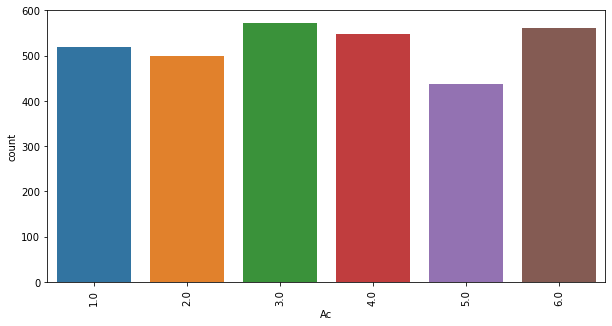

In [378]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="Ac", data=DF_train)
plt.xticks(x = DF_train['Ac'],  rotation='vertical')
plt.show()

In [379]:
DF_train

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,Ac
0,-5.390129,0.312017,-1.080219,0.500379,0.683685,-0.403603,0.782949,-0.558957,-1.528049,0.591393,...,-0.015221,0.011543,-0.085097,0.038189,0.029094,0.001408,0.016184,-0.020135,-0.001664,1.0
1,-5.880304,0.591390,-1.484818,1.166462,-0.164773,-0.565025,0.084460,-0.391220,-0.548044,-0.846393,...,0.013324,-0.003875,0.024981,0.024770,0.004239,-0.000846,0.000576,0.016982,-0.032628,2.0
2,-5.367544,-0.242330,1.876596,1.067840,-1.062747,0.759069,0.848878,0.563395,-0.064170,-1.200212,...,0.015365,-0.005842,-0.018071,-0.035462,-0.038575,-0.010195,0.029965,-0.032898,0.004596,2.0
3,4.315188,-0.746519,-0.195893,-1.220039,0.333927,0.634507,0.013593,0.801240,-0.914543,0.409743,...,-0.064677,0.023505,-0.094333,-0.027424,-0.002860,0.060503,-0.028082,0.048437,0.025287,3.0
4,6.569182,0.682262,-0.084544,0.662535,-0.622109,1.516147,-1.155118,-0.073502,-0.342107,0.901646,...,0.051419,0.071690,0.030829,-0.056715,-0.062957,-0.032257,0.089604,-0.011406,0.027916,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,-4.262705,1.901877,-1.832084,-1.374277,0.006015,0.419609,0.704941,0.349627,-0.104556,0.423361,...,0.037798,-0.017420,-0.018659,-0.036725,-0.023778,0.012960,-0.069829,0.075623,0.004663,5.0
3229,3.051131,-1.107940,-0.326978,-1.423366,0.527082,1.319177,0.088882,0.681832,-0.947488,0.698343,...,-0.022474,0.046731,0.017676,-0.030366,0.014064,0.016752,-0.087904,-0.078274,-0.029041,1.0
3230,-5.913182,1.375278,-1.186664,0.635444,-0.449790,0.379178,-0.267951,1.068100,0.289257,-0.150330,...,0.018097,-0.047262,-0.008438,0.025375,-0.004563,-0.007570,-0.012897,0.033830,-0.009982,6.0
3231,3.942680,-0.945985,-0.234788,-1.708363,0.042290,-0.814469,0.897256,-0.053221,-0.049337,-0.294918,...,-0.013020,0.025676,-0.002255,0.050549,0.020895,-0.033132,-0.000200,-0.042189,0.013892,6.0


In [380]:
df_test

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
3233,5.407608,-0.035174,0.044675,-0.899535,0.601242,0.960152,0.349488,0.759600,-0.499117,0.973312,...,-0.044324,-0.039552,0.017129,-0.035464,-0.092840,-0.097932,-0.055686,0.004645,0.063767,-0.016405
3234,4.585225,-0.518827,-0.407736,-0.755091,-0.664329,-1.399451,0.653591,0.529709,0.285853,-1.039904,...,0.023556,0.073381,-0.016885,-0.023557,0.042190,0.052464,-0.022667,-0.019720,0.010006,0.049405
3235,8.237526,2.149683,0.403012,0.749141,-0.928571,0.659792,-0.229077,-1.022824,-0.959285,1.027868,...,0.098518,-0.067884,-0.017578,0.038239,0.034558,-0.022062,0.037552,0.034193,-0.015033,-0.060214
3236,5.490285,0.926298,-0.617217,-1.023223,0.320154,0.196330,1.654224,-0.068256,-0.798530,-0.892020,...,-0.017454,0.025585,0.037934,-0.008454,-0.035526,-0.006243,0.007701,0.025747,-0.000831,-0.002189
3237,-4.747172,-1.070617,3.263931,-0.300537,-0.327830,-0.676974,-0.145247,-1.350407,0.936912,-0.270781,...,0.030390,-0.023387,-0.026656,0.042105,0.010490,0.022870,0.002213,-0.045551,0.034458,-0.002621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3537,4.736297,0.930313,-0.745259,-1.592892,-0.192622,-0.200883,1.106729,0.532914,-1.206021,-0.858217,...,0.015881,0.003825,-0.031112,-0.072506,0.060716,-0.017329,0.011233,-0.025783,-0.026427,-0.051555
3538,8.499518,1.846970,0.505834,0.336669,-0.962154,0.050977,-0.550624,-0.253482,-0.319387,0.797191,...,-0.039287,0.055881,0.067702,0.029716,-0.018788,0.079733,-0.026245,-0.009347,-0.026795,-0.028099
3539,8.631391,1.827196,0.217989,0.862158,-1.743630,-0.837091,-0.010199,-0.901280,0.461292,0.479283,...,0.004116,-0.055829,-0.019288,-0.026273,0.037088,0.061851,-0.062002,-0.062852,-0.042942,0.002202
3540,-5.814001,2.097427,1.012212,-1.034874,0.455886,0.821535,-0.781266,0.757715,0.252234,-0.573829,...,0.035365,0.003420,0.061972,-0.010752,0.018537,-0.036929,0.019278,-0.017664,0.048025,-0.002840


In [381]:
DF_train.to_csv('TrainAfter.csv') 

In [382]:
df_test.to_csv('TestAfter.csv') 

In [383]:
X = pd.DataFrame(DF_train.drop(['Ac'],axis=1))
y = DF_train.Ac.values.astype(int)

X.shape, Y.shape

((3134, 250), (3233,))

In [384]:
X

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,-5.390129,0.312017,-1.080219,0.500379,0.683685,-0.403603,0.782949,-0.558957,-1.528049,0.591393,...,0.011719,-0.015221,0.011543,-0.085097,0.038189,0.029094,0.001408,0.016184,-0.020135,-0.001664
1,-5.880304,0.591390,-1.484818,1.166462,-0.164773,-0.565025,0.084460,-0.391220,-0.548044,-0.846393,...,0.012170,0.013324,-0.003875,0.024981,0.024770,0.004239,-0.000846,0.000576,0.016982,-0.032628
2,-5.367544,-0.242330,1.876596,1.067840,-1.062747,0.759069,0.848878,0.563395,-0.064170,-1.200212,...,0.017329,0.015365,-0.005842,-0.018071,-0.035462,-0.038575,-0.010195,0.029965,-0.032898,0.004596
3,4.315188,-0.746519,-0.195893,-1.220039,0.333927,0.634507,0.013593,0.801240,-0.914543,0.409743,...,0.003727,-0.064677,0.023505,-0.094333,-0.027424,-0.002860,0.060503,-0.028082,0.048437,0.025287
4,6.569182,0.682262,-0.084544,0.662535,-0.622109,1.516147,-1.155118,-0.073502,-0.342107,0.901646,...,-0.040279,0.051419,0.071690,0.030829,-0.056715,-0.062957,-0.032257,0.089604,-0.011406,0.027916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,-4.262705,1.901877,-1.832084,-1.374277,0.006015,0.419609,0.704941,0.349627,-0.104556,0.423361,...,-0.030178,0.037798,-0.017420,-0.018659,-0.036725,-0.023778,0.012960,-0.069829,0.075623,0.004663
3229,3.051131,-1.107940,-0.326978,-1.423366,0.527082,1.319177,0.088882,0.681832,-0.947488,0.698343,...,0.019162,-0.022474,0.046731,0.017676,-0.030366,0.014064,0.016752,-0.087904,-0.078274,-0.029041
3230,-5.913182,1.375278,-1.186664,0.635444,-0.449790,0.379178,-0.267951,1.068100,0.289257,-0.150330,...,0.004673,0.018097,-0.047262,-0.008438,0.025375,-0.004563,-0.007570,-0.012897,0.033830,-0.009982
3231,3.942680,-0.945985,-0.234788,-1.708363,0.042290,-0.814469,0.897256,-0.053221,-0.049337,-0.294918,...,-0.026159,-0.013020,0.025676,-0.002255,0.050549,0.020895,-0.033132,-0.000200,-0.042189,0.013892


In [385]:
y.shape

(3134,)

In [386]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=2,shuffle =True,stratify=y)

In [387]:
from sklearn.tree import DecisionTreeClassifier


decision_tree_classifier = DecisionTreeClassifier()

decision_tree_classifier.fit(X_train, y_train)

decision_tree_classifier.score(X_test, y_test)

0.16521739130434782

In [388]:
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

In [389]:
model2 = LGBMClassifier()
model2.fit(X_train,y_train)

LGBMClassifier()

In [390]:
model2.score(X_test,y_test)

0.18743961352657004

In [391]:
yp= model2.predict(X_test)

In [392]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           1       0.12      0.09      0.11       171
           2       0.17      0.16      0.17       164
           3       0.23      0.31      0.27       189
           4       0.18      0.20      0.19       181
           5       0.17      0.10      0.12       145
           6       0.20      0.23      0.21       185

    accuracy                           0.19      1035
   macro avg       0.18      0.18      0.18      1035
weighted avg       0.18      0.19      0.18      1035



In [393]:
clf = SVC()
clf = clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
trains = clf.score(X_train, y_train)
tests = clf.score(X_test,y_predicted)
'SVM fitting scores: Training %.4f Testing %.4f'%(trains , tests)

'SVM fitting scores: Training 0.3630 Testing 1.0000'

Text(0.5, 1.0, 'Average score: 0.1607913961864838')

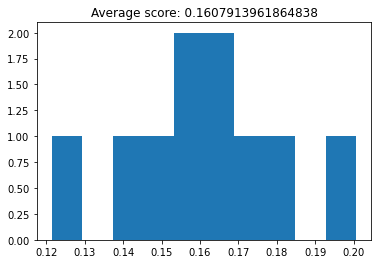

In [394]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

cv_scores = cross_val_score(decision_tree_classifier, X, y, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))